In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.shape

(205, 15)

In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [8]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [9]:
df.replace('?',  np.nan, inplace= True)

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [12]:
normalized_losses_mean= df['normalized-losses'].mean()
normalized_losses_mean = round(normalized_losses_mean,2)
df['normalized-losses'].fillna(normalized_losses_mean, inplace= True)

In [13]:
df['horsepower'] = df['horsepower'].astype(float) 
horsepower_mean = df['horsepower'].mean()
horsepower_mean = round(horsepower_mean, 2)
df['horsepower'].fillna(horsepower_mean, inplace = True)

In [14]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df_obj = df.select_dtypes(object)
df_obj.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [17]:
df_num = df.select_dtypes([int,float])
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [18]:
le= LabelEncoder()

In [19]:
for col in df_obj:
    df[col]=le.fit_transform(df[col])

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,122.0,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.0,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.0,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450


In [21]:
X = df.drop(columns=['price'])
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [22]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [23]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict=lr.predict(X_test)

In [24]:
def fitness(model):
    Train_score=model.score(X_train, Y_train)
    print('Train_score: ', Train_score)
    Test_score=model.score(X_test, Y_test)
    print('Test_score: ', Test_score)
    Difference = (Train_score-Test_score).round(4)
    print('Difference:', Difference)
    if Train_score>Test_score:
        if Difference>0.05:
            print('Overfit')
        else:
            print('Fine')
    else:
            print ('Underfit')

In [25]:
fitness(lr)

Train_score:  0.8504573850703121
Test_score:  0.7804448591373003
Difference: 0.07
Overfit


In [26]:
for i in range(200,1000,50): 
    print(i)
    L1 = Lasso(i) 
    L1.fit(X_train, Y_train) 
    fitness(L1)
    print('')

200
Train_score:  0.8410268620601096
Test_score:  0.7988601673027229
Difference: 0.0422
Fine

250
Train_score:  0.838534654977973
Test_score:  0.7984663283724596
Difference: 0.0401
Fine

300
Train_score:  0.8354885471742652
Test_score:  0.7975490610130549
Difference: 0.0379
Fine

350
Train_score:  0.8319943825124216
Test_score:  0.7961569773513338
Difference: 0.0358
Fine

400
Train_score:  0.8284659154850252
Test_score:  0.79447063614906
Difference: 0.034
Fine

450
Train_score:  0.8249548441950953
Test_score:  0.792448035231893
Difference: 0.0325
Fine

500
Train_score:  0.8210307181455541
Test_score:  0.7900141247643805
Difference: 0.031
Fine

550
Train_score:  0.8166935515578972
Test_score:  0.7871689008199703
Difference: 0.0295
Fine

600
Train_score:  0.8119433965076881
Test_score:  0.7839123629596888
Difference: 0.028
Fine

650
Train_score:  0.8067802659413451
Test_score:  0.7802445461340558
Difference: 0.0265
Fine

700
Train_score:  0.8018565845458776
Test_score:  0.776409071699337

In [27]:
L1 = Lasso(200) #200 seems good here as less than 0.05
L1.fit(X_train, Y_train) 
train_score_L1=L1.score(X_train, Y_train).round(4)
test_score_L1=L1.score(X_test, Y_test).round(4)
print ('Training score L1:', train_score_L1)
print ('Testing score L1:', test_score_L1)

Training score L1: 0.841
Testing score L1: 0.7989


In [28]:
for i in range(0,51):
    print(i)
    L2=Ridge(i)
    L2.fit(X_train, Y_train)
    fitness(L2)
    print('')

0
Train_score:  0.8504573850703121
Test_score:  0.7804448591373008
Difference: 0.07
Overfit

1
Train_score:  0.850210782002804
Test_score:  0.7837298311736146
Difference: 0.0665
Overfit

2
Train_score:  0.8497208517776911
Test_score:  0.7863046812718254
Difference: 0.0634
Overfit

3
Train_score:  0.8491422097417206
Test_score:  0.7884208714463422
Difference: 0.0607
Overfit

4
Train_score:  0.8485240458234763
Test_score:  0.7901997363382566
Difference: 0.0583
Overfit

5
Train_score:  0.8478856084653255
Test_score:  0.7917137362778897
Difference: 0.0562
Overfit

6
Train_score:  0.8472358490761664
Test_score:  0.7930119966838592
Difference: 0.0542
Overfit

7
Train_score:  0.8465795679474781
Test_score:  0.7941304276864146
Difference: 0.0524
Overfit

8
Train_score:  0.8459196357004446
Test_score:  0.7950965291890773
Difference: 0.0508
Overfit

9
Train_score:  0.8452579042609184
Test_score:  0.795932015030834
Difference: 0.0493
Fine

10
Train_score:  0.8445956271734699
Test_score:  0.796654

In [29]:
L2 = Ridge(9) #9 seems good here as less than 0.05
L2.fit(X_train, Y_train) 
fitness(L2)

Train_score:  0.8452579042609184
Test_score:  0.795932015030834
Difference: 0.0493
Fine


In [30]:
dict2= {'Columns': X.columns, 'Lassso Slope':L1.coef_.round(4),'Linear Slope': lr.coef_.round(4),'Ridge Slope': L2.coef_.round(4) }
df2=pd.DataFrame(dict2)
df2

,Columns,Lassso Slope,Linear Slope,Ridge Slope
0,symboling,-0.0000,57.8191,-83.7578
1,normalized-losses,0.0000,44.4784,31.6260
2,make,-983.4104,-1253.8780,-1183.6241
3,fuel-type,-206.5825,-178.9989,-411.5144
4,body-style,-0.0000,-149.8554,-263.8646
5,drive-wheels,845.3612,1058.5224,1027.7593
6,engine-location,1971.7646,2352.2652,2044.0080
7,width,1526.4505,1700.0826,1572.9698
8,height,676.3873,918.2779,927.6168
9,engine-type,146.2315,309.6522,383.1063


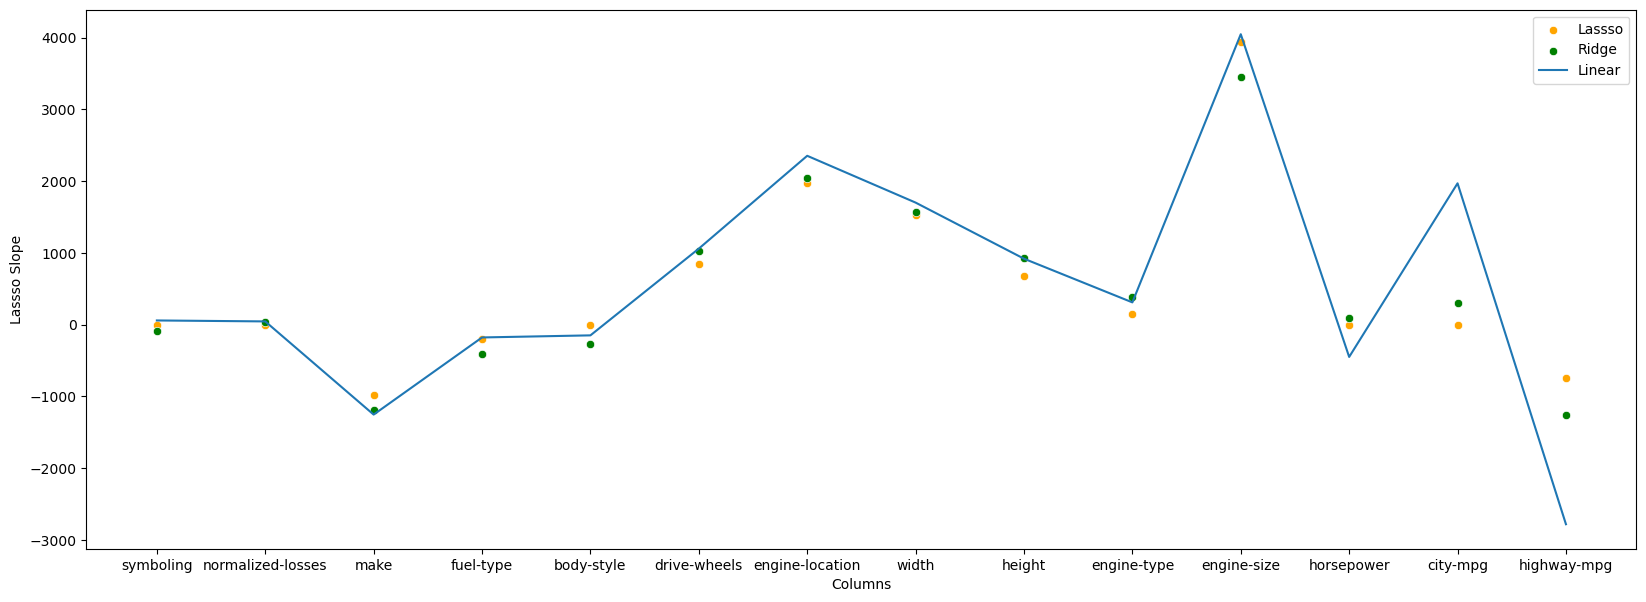

In [31]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=dict2, x='Columns', y='Lassso Slope', label='Lassso', color='orange')
sns.scatterplot(data=dict2, x='Columns', y='Ridge Slope', label='Ridge', color='green')
sns.lineplot(data=dict2, x='Columns', y='Linear Slope', label='Linear')
plt.legend()

In [32]:
cross_linear = cross_val_score(lr,X,Y,cv=4)
cross_lasso = cross_val_score(L1,X,Y,cv=4)
cross_ridge = cross_val_score(L2,X,Y,cv=4)
print('Linear: ',cross_linear)
print('L1: ',cross_lasso)
print('L2: ',cross_ridge)

Linear:  [0.66862693 0.85491347 0.36612544 0.48027479]
L1:  [0.76560873 0.81872348 0.43344667 0.44838215]
L2:  [0.73757986 0.86135498 0.40212212 0.45427107]


In [33]:
print('Mean of cross_linear: ',cross_linear.mean().round(4)) 
print('Mean of cross_lasso: ',cross_lasso.mean().round(4))
print('Mean of cross_ridge: ',cross_ridge.mean().round(4)) 

Mean of cross_linear:  0.5925
Mean of cross_lasso:  0.6165
Mean of cross_ridge:  0.6138


In [34]:
'''Thus seems like Lasso regularisation seems good as the Mean of cross_lasso > Mean of cross_ridge'''

'Thus seems like Lasso regularisation seems good as the Mean of cross_lasso > Mean of cross_ridge'